# 4. Modelling

**Jordan Miranda**

**Course: BrainStation Data Science**

**Previous Notebook: 3. Feature Engineering**

**Next Notebook: 5. Findings**

Now that we've gone through feature engineering to create relative-value metrics (ex. `Start_Freq`) rather than absolute value metrics (ex. `MP`) we can begin to create our first models. 

As a refresh, the goal of our analysis is to find players of similar playstyle through clustering.

With this knowledge, we'll be performing unsupervised learning on our dataset using clustering to see if our model can detect groups of similar players with the stats provided.

The first model of choice will be a K-Means model.

To begin our modelling, let's import our standard toolbox and if we need new tools we can import them as we go.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

### Reading in the Data

We'll begin by reading our saved dataset from notebook **#3 Feature Engineering**.

In [2]:
# reading in the CSV and indicating our index column (player_name)
grouped_stats = pd.read_csv("FormattedCapstoneData/grouped_stats_df.csv", index_col=0)
# check it worked - looks good!
grouped_stats

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,2019.50,19.50,2000.0,20.50,11.50,1024.50,2.50,1.00,2.50,0.00,0.00,0.00,0.00,0.22,0.09,0.32,0.22,0.32,1.0,0.00,0.0,0.00,0.0,0.00,0.56,49.47,52.88,0.00,0.28
Aaron-Cresswell,2017.00,27.00,1989.0,32.00,31.29,2772.14,1.14,3.14,1.14,0.00,0.00,3.86,0.29,0.03,0.10,0.13,0.03,0.13,0.0,0.29,0.0,0.00,0.0,0.00,0.97,85.95,103.79,0.00,0.73
Aaron-Hickey,2020.00,18.00,2002.0,11.00,10.00,758.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,1.00,0.91,68.91,42.11,0.00,0.49
Aaron-Hughes,2011.50,31.50,1979.0,23.50,22.50,2033.50,0.25,0.00,0.25,0.00,0.00,0.75,0.00,0.01,0.00,0.01,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.94,85.30,65.46,0.00,0.00
Aaron-Hunt,2013.67,26.67,1986.0,21.56,17.67,1557.78,3.78,2.56,2.56,1.22,1.56,1.56,0.11,0.21,0.12,0.32,0.16,0.27,0.0,1.00,1.0,0.00,0.0,0.00,0.76,67.12,59.57,0.79,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zouhair-Feddal,2016.14,27.14,1989.0,18.29,17.57,1551.29,1.14,0.71,1.14,0.00,0.00,6.57,0.86,0.06,0.04,0.10,0.06,0.10,0.0,0.29,0.0,0.71,0.0,0.29,0.96,84.94,57.07,0.00,0.41
Zouheir-Dhaouadi,2012.00,24.00,1988.0,8.00,1.00,235.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.38,0.0,1.00,0.0,0.00,1.0,0.00,0.12,29.38,9.79,0.00,0.00
Zubi,2013.00,20.00,1993.0,1.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,1.00,0.0,0.00,0.00,6.00,0.30,0.00,0.50


There shouldn't be any missing values but let's do a quick check to make sure.

In [3]:
grouped_stats.isna().sum()

Year                               0
Age                                0
Born                               0
MP                                 0
Starts                             0
Min                                0
Gls                                0
Ast                                0
G-PK                               0
PK                                 0
PKatt                              0
CrdY                               0
CrdR                               0
Gls_p90                            0
Ast_p90                            0
G+A_p90                            0
G-PK_p90                           0
G+A-PK_p90                         0
Pos_FW                             0
Pos_MF                             0
Bundesliga                         0
La Liga                            0
Ligue 1                            0
Serie A                            0
Start_Freq                         0
Avg_Mins_pGame                     0
Mins_to_Age                        0
P

Looks like we're good to begin modelling! First we'll need to scale our data.

# Model 1 - K-Means

We'll start with a K-Means model as it is the most frequently used model when performing clustering in unsupervised learning. K-Means model is our first model of choice here as we get to pass a `n_cluster` parameter of our choosing. We'll want to pick a K value that performs well but also one that makes intuitive sense for the goal of our research.

# Model 1.1 - Fitting First K-Means

### 1.1 - Scaling the Data

Since clustering relies on distance to classify data points, scaling our data is necessary to normalize the features to the same levels of magnitude, remove skews, and center it.

Since we are performing unsupervised learning on our dataset there's no need to perform a train/test split. We can simply instantiate our scaler of choice then use it to fit and transform our dataset. Let's scale our data now.

In [4]:
# import scaler from sklearn
from sklearn.preprocessing import StandardScaler

# instantiate standard scaler
ss = StandardScaler()

# unsupervised learning so no train/test set
# IFT on entire dataset

# fit and transform
scaled_data = ss.fit_transform(grouped_stats)

In [5]:
# holds all the values of our dataset post-scaling
scaled_data

array([[ 1.44984723, -1.11130374,  1.5422978 , ...,  0.44648739,
        -0.37784159, -0.67040223],
       [ 0.64231312,  0.62741322, -0.21905017, ...,  2.14193243,
        -0.37784159,  1.01808239],
       [ 1.61135406, -1.45904713,  1.86254288, ...,  0.08781634,
        -0.37784159,  0.11755726],
       ...,
       [-0.64974146, -0.99538927,  0.42144   , ..., -1.30457332,
        -0.37784159,  0.15507914],
       [-1.6187824 ,  0.85924215, -1.33990797, ..., -1.26094666,
        -0.37784159,  0.15507914],
       [-1.6187824 , -1.2272182 ,  0.10119491, ..., -1.26560905,
        -0.37784159,  0.15507914]])

Now that we've successfully scaled our data, it's become an array of values. The values need to be put back into a DataFrame to understand which player and feature the value belongs to. Let's assemble our scaled DataFrame using our `scaled_data` array with the columns and index from our original DataFrame `grouped_stats`.

In [6]:
# putting scaled values back into new df

# using the original df columns / index to piece together the new df filled with scaled values
grouped_scaled_stats = pd.DataFrame(scaled_data, columns=grouped_stats.columns, index=grouped_stats.index)

# check that it worked - looks good!
grouped_scaled_stats

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,1.449847,-1.111304,1.542298,0.573978,0.063714,0.042603,0.565671,0.100535,0.689715,-0.257259,-0.277102,-1.038747,-0.493151,0.351108,0.074322,0.346553,0.373629,0.364085,2.475634,-1.174273,-0.485104,-0.533597,-0.560862,-0.536060,-0.012485,-0.175744,0.446487,-0.377842,-0.670402
Aaron-Cresswell,0.642313,0.627413,-0.219050,1.795604,2.294793,2.314401,-0.054378,1.798414,-0.008274,-0.257259,-0.277102,0.737070,0.635794,-0.200235,0.115015,-0.094495,-0.186093,-0.081837,-0.452540,-0.554923,-0.485104,-0.533597,-0.560862,-0.536060,1.272919,1.371986,2.141932,-0.377842,1.018082
Aaron-Hickey,1.611354,-1.459047,1.862543,-0.435192,-0.105392,-0.303827,-0.574124,-0.692866,-0.593352,-0.257259,-0.277102,0.341422,3.399763,-0.287289,-0.291911,-0.396265,-0.274470,-0.386942,-0.452540,-1.174273,-0.485104,-0.533597,-0.560862,2.035433,1.084811,0.649033,0.087816,-0.377842,0.117557
Aaron-Hughes,-1.134262,1.670643,-1.820276,0.892663,1.303829,1.354226,-0.460145,-0.692866,-0.465046,-0.257259,-0.277102,-0.693705,-0.493151,-0.258271,-0.291911,-0.373052,-0.245011,-0.363472,-0.452540,-1.174273,-0.485104,-0.533597,-0.560862,-0.536060,1.178865,1.344408,0.865436,-0.377842,-1.721015
Aaron-Hunt,-0.433322,0.550910,-0.699418,0.686580,0.759306,0.735826,1.149246,1.338241,0.720509,2.786636,2.923683,-0.321059,-0.064931,0.322090,0.196400,0.346553,0.196874,0.246737,-0.452540,0.961417,2.227129,-0.533597,-0.560862,-0.536060,0.614542,0.573089,0.669283,2.334201,-0.220140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zouhair-Feddal,0.364521,0.659869,-0.219050,0.339213,0.748032,0.727390,-0.054378,-0.129551,-0.008274,-0.257259,-0.277102,1.983823,2.854755,-0.113181,-0.129141,-0.164134,-0.097716,-0.152246,-0.452540,-0.554923,-0.485104,1.313013,-0.560862,0.209673,1.241568,1.329135,0.586026,-0.377842,-0.182618
Zouheir-Dhaouadi,-0.972755,-0.068074,-0.379173,-0.753877,-1.120032,-0.983686,-0.118206,-0.692866,-0.080125,-0.257259,-0.277102,-1.038747,-0.493151,0.815397,-0.291911,0.485831,0.844973,0.504902,-0.452540,0.961417,-0.485104,-0.533597,1.943061,-0.536060,-1.391942,-1.028098,-0.988530,-0.377842,-1.721015
Zubi,-0.649741,-0.995389,0.421440,-1.497475,-1.232770,-1.281369,-0.574124,-0.692866,-0.593352,-0.257259,-0.277102,-1.038747,-0.493151,-0.287289,-0.291911,-0.396265,-0.274470,-0.386942,-0.452540,0.961417,-0.485104,2.067262,-0.560862,-0.536060,-1.768158,-2.020037,-1.304573,-0.377842,0.155079


We've now got our DataFrame containing our scaled values, we can begin to apply a K-Means model on our dataset to identify clusters of players. 

To determine the number of clusters we'll perform a for loop going over K-values from 1 to 20. For each K-value we'll want to keep track of the inertia and silhouette scores to gauge which K-value seems to fit the best for our model. Once we've iterated through every K-value we can plot out the results and visually identify our optimal K-value.

If there's 2 or more K-values that come close in inertia & silhouette scores we'll pick the smaller K-value as we don't want our clusters to become too specific and fitting to only very small subsets of players.

We choose to use inertia and silhouette scores when evaluating our models as they are two of the most relevant metrics when it comes to evaluating clustering models.

Inertia is known as the *Within Sum of Squares (WSS)* distance. The goal with inertia is to minimize the sum of squared distances between each point and its assigned cluster center. The closer we are to zero, the less distant our data points are from its assigned cluster center (or the more it "fits" into its assigned cluster). The goal is to minimize this WSS distance. There is no normalized score when it comes to inertia but the smaller the value the better.

Silhouette scoring is used to hlep identify the optimal K-value in models that allow us to pass the argument `n_cluster`. The silhouette score measures how similar points are to their assigned clusters relative to the other clusters they are **not** assigned to. Our goal is to maximize our silhouette score unlike inertia. A silhouette score closer to 1 means our clusters are well separated and closer on average to points in their cluster than others.

Now that we've established what our metrics of choice will be to evaluate our models, let's begin on our first model.

###  1.1 - Determining an Optimal K-Value

In [7]:
# looking at inertia and silhouette scores for each k-value in our first KMM

# importing our K-means model and silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# initializing list of metrics to hold results of inertia / silhouette
metrics = []

# Ks to search over 1-20
k_vals = np.arange(1, 21)

# iterating over Ks in for loop
for k in k_vals:
    
    # instantiate K-Means model
    # setting number of cluster to our range of k values
    # random_state for reproducability
    kmm = KMeans(n_clusters=k, random_state=1)
    
    # fit on whole dataset (unsupervised learning)
    kmm.fit(grouped_scaled_stats)
    
    # predict cluster labels
    kmm_labels = kmm.predict(grouped_scaled_stats)
    
    # look at inertia of model
    inertia = kmm.inertia_
    
    # silhouette score of model
    # cant have silhouette score for a single cluster so we create 
    # an if/else statement to address it
    if k > 1:
        silhouette = silhouette_score(grouped_scaled_stats, kmm_labels)
    else:
        silhouette = np.NaN
        
    # adding our metrics list through a dictionary
    metrics.append({"inertia":inertia, "silhouette":silhouette})


Now that we've got our inertia and silhouette scores for K-values between 1-20, let's put them into a DataFrame to be able to graph them out. 

In [8]:
# putting the results into a df
# the dictionaried keys become our columns and the values they held become the entries
# the K values become our index
metrics_df = pd.DataFrame(metrics, index=k_vals)

# check - looks good
metrics_df.head()

,inertia,silhouette
1,231072.000000,NaN
2,189238.067386,0.190227
3,168496.369559,0.186960
4,154595.181456,0.191483
5,146681.791051,0.111752


Just from the head of this metrics dataframe we can see that with a K-value of `4` we had some promising results. Our silhouette score peaked at 4 before dropping sharply at a K-value of 5. However, let's take a look at the graphs containing all 20 K-values before we come to a conclusion.

Our K-values will become the x-axis of our graph while the inertia and silhouette scores will be the y-axis for each respective graph.

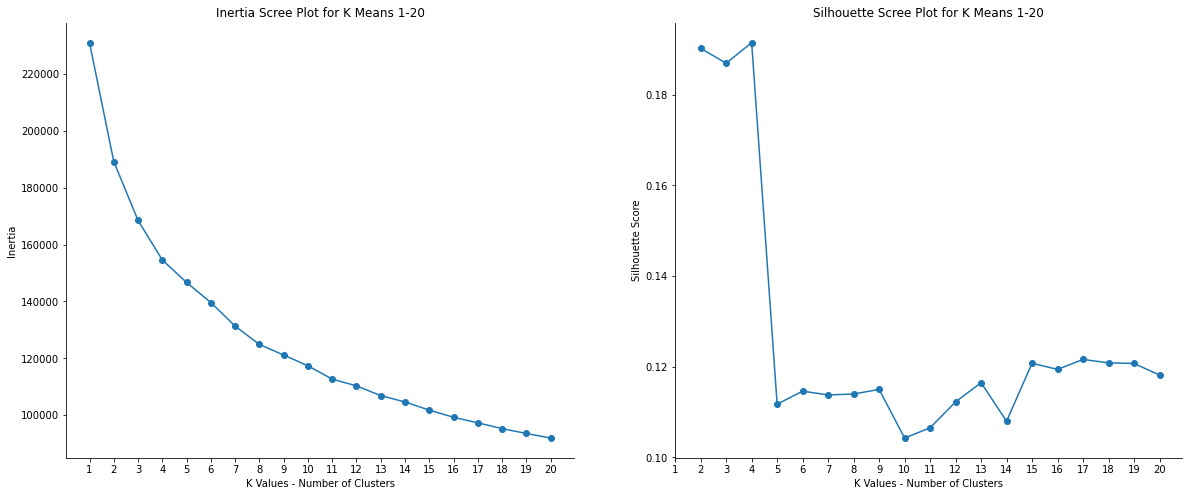

In [9]:
# Visualize metric graphs in subplot
plt.subplots(1, 2, figsize=(20, 8))

# subplot 1 - inertia
plt.subplot(1, 2, 1)
metrics_df["inertia"].plot(marker="o")

# labels and cleaning for subplot 1
plt.title("Inertia Scree Plot for K Means 1-20")
plt.ylabel("Inertia")
plt.xlabel("K Values - Number of Clusters")
plt.xticks(k_vals)
plt.ticklabel_format(style='plain') # don't want scientific notation
sns.despine()

# subplot 2 - silhouette
plt.subplot(1, 2, 2)
metrics_df["silhouette"].plot(marker="o")

# labels and cleaning for subplot 2
plt.title("Silhouette Scree Plot for K Means 1-20")
plt.ylabel("Silhouette Score")
plt.xlabel("K Values - Number of Clusters")
plt.xticks(k_vals)
sns.despine()

# show and save
plt.savefig("Inertia and Silhouette Scree Plot for K Means 1-20 K Values.png")
plt.show()


As we had seen in our metrics dataframe above, our best silhouette score occurs at a K-value of 4. After 4 the silhouette score drops sharply (relative to the range of our values) and doesn't seem to recover. We also don't see an "elbow" in our Inertia scores so the choice for an optimal K-value is slightly subjective. Intuitively we don't want a large number of clusters with our dataset anyway so we will decide to use a K-value of 4 for our model.

### 1.1 - Modelling

Now that we've scaled our data and found an optimal K-value (4) we can create our first iteration of our K-Means model.

In [10]:
# Fit first K-Means model

# instantiate
# 4 was our optimal K-value
kmm_first = KMeans(n_clusters=4, random_state=1)

# fit on whole dataset
kmm_first.fit(grouped_scaled_stats)

# get cluster labels from prediction
kmm_first_labels = kmm_first.predict(grouped_scaled_stats)

### 1.1 - Examining Clustered Groups

Now that we've run our model and saved the cluster labels in `kmm_first_labels`, let's take a look into what our K-Means model uncovered in the data.

In [11]:
# lets take a look at the sizings
np.unique(kmm_first_labels, return_counts=True)

(array([0, 1, 2, 3]), array([ 797, 3629, 3532,   10], dtype=int64))

Since we passed the argument `n_clusters=4` it's no surprise we only have four cluster labels.

When we look at the number of players in the clusters however there a few things that stand out initially:
 - We have an extremely small group of players (only 10) in cluster label 3. Could these players be outliers in a good way? (Extremely skilled players like Messi, Ronaldo for example.)
 - Cluster labels 1 & 2 both have an almost equal number of players in them. We'll want to look into what the major distinctions are between the two.
 - Cluster label 0 is only approximately 22% the size of labels 1 & 2, what features did 0 differ from 1 & 2 that created this small cluster.
 
Let's attach our labels to our player's dataset with the original values to investigate further.

Before we attach the values we'll perform a quick shape check to ensure the number of rows matches.

In [12]:
# checking the number of rows matches before attaching
kmm_first_labels.shape[0] == grouped_scaled_stats.shape[0]

True

We're good to go!

In [13]:
# make copy of original non-scaled stats df
km1_cluster_stats = grouped_stats.copy()

# attach new column with the cluster labels to new df
km1_cluster_stats["Cluster"] = kmm_first_labels

# check new df
km1_cluster_stats

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90,Cluster
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,2019.50,19.50,2000.0,20.50,11.50,1024.50,2.50,1.00,2.50,0.00,0.00,0.00,0.00,0.22,0.09,0.32,0.22,0.32,1.0,0.00,0.0,0.00,0.0,0.00,0.56,49.47,52.88,0.00,0.28,1
Aaron-Cresswell,2017.00,27.00,1989.0,32.00,31.29,2772.14,1.14,3.14,1.14,0.00,0.00,3.86,0.29,0.03,0.10,0.13,0.03,0.13,0.0,0.29,0.0,0.00,0.0,0.00,0.97,85.95,103.79,0.00,0.73,2
Aaron-Hickey,2020.00,18.00,2002.0,11.00,10.00,758.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,1.00,0.91,68.91,42.11,0.00,0.49,2
Aaron-Hughes,2011.50,31.50,1979.0,23.50,22.50,2033.50,0.25,0.00,0.25,0.00,0.00,0.75,0.00,0.01,0.00,0.01,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.94,85.30,65.46,0.00,0.00,2
Aaron-Hunt,2013.67,26.67,1986.0,21.56,17.67,1557.78,3.78,2.56,2.56,1.22,1.56,1.56,0.11,0.21,0.12,0.32,0.16,0.27,0.0,1.00,1.0,0.00,0.0,0.00,0.76,67.12,59.57,0.79,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zouhair-Feddal,2016.14,27.14,1989.0,18.29,17.57,1551.29,1.14,0.71,1.14,0.00,0.00,6.57,0.86,0.06,0.04,0.10,0.06,0.10,0.0,0.29,0.0,0.71,0.0,0.29,0.96,84.94,57.07,0.00,0.41,2
Zouheir-Dhaouadi,2012.00,24.00,1988.0,8.00,1.00,235.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.38,0.0,1.00,0.0,0.00,1.0,0.00,0.12,29.38,9.79,0.00,0.00,1
Zubi,2013.00,20.00,1993.0,1.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,1.00,0.0,0.00,0.00,6.00,0.30,0.00,0.50,1


We've now attached our first K-Means model labels to the players in our dataset! We can now begin to analyze the clusters based on our player metrics. 

Let's use `.groupby("Cluster")` to gather all players under their cluster label and then use `.mean()` to get the average for each feature in each cluster label.

#### 1.1 Average Stats per Cluster Label

In [14]:
# grouping the players by their cluster label and 
# getting the means for each cluster
km1_cluster_stats.groupby("Cluster").mean().T
# transposing for readability

Cluster,0,1,2,3
Year,2015.075408,2015.219237,2014.779844,2016.350
Age,26.313350,22.090959,26.117602,18.450
Born,1988.402133,1992.786401,1988.306625,1997.500
MP,24.809247,7.049449,21.209802,2.250
Starts,18.660402,2.943147,17.431297,0.850
Min,1664.930276,300.975828,1552.113194,82.250
Gls,6.075119,0.351667,1.107106,0.550
Ast,2.766110,0.240234,1.097378,0.600
G-PK,5.159097,0.344296,1.088681,0.550
PK,0.915997,0.007363,0.018349,0.000


### 1.1 - Identifying & Discarding Outliers

As we suspected earlier when looking at the value counts of each cluster, cluster 3 seems to be players with outlier stats. They have extremely low `Min` (Minutes played) and low `Avg_Mins_pGame` played compared to the other 3 clusters yet their `_p90` stats are exponentially higher than the others. This signals that these players may have scored/assisted 1 or 2 goals in their little amount of time played and it's caused their `_p90` metrics to extrapolate from the little time that was given. A final tell that these players are outliers is that given their average `Age` - 18, it's *highly* unlikely these players are performing so well at such a young age.

We'll likely be needing to drop these players as they lack sufficient sample size (minutes played) and aren't accurate representations of their true form on the field.

Before we drop them let's take a quick look as to how disproportionate their metrics are compared to the rest of the players.

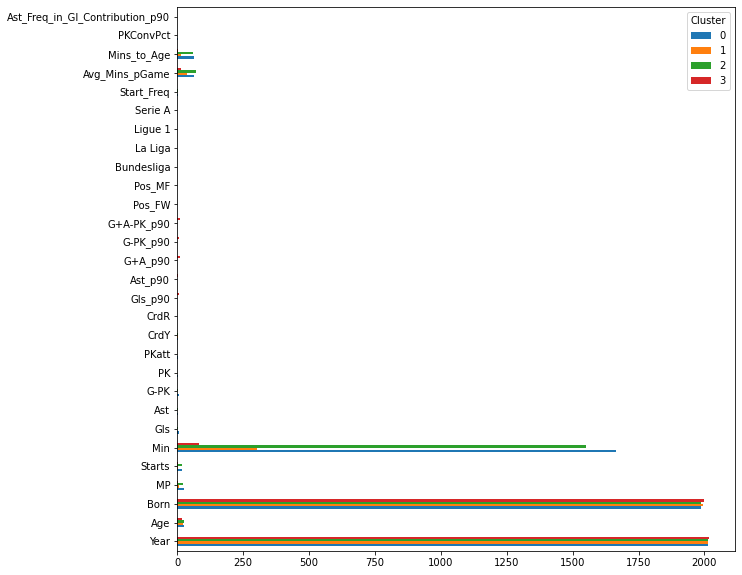

In [15]:
# visualize the columns in the dataframe difference in means for 
# each cluster label and plotting into horizontal bar chart
km1_cluster_stats.groupby("Cluster").mean().T.plot(kind="barh", figsize=(10, 10))
plt.show()

The columns `Year`, `Born` (birth year) and `Minutes` are causing the other values to not be viewable due to their large absolute numbers. Let's drop them for this visual and recreate this graph.

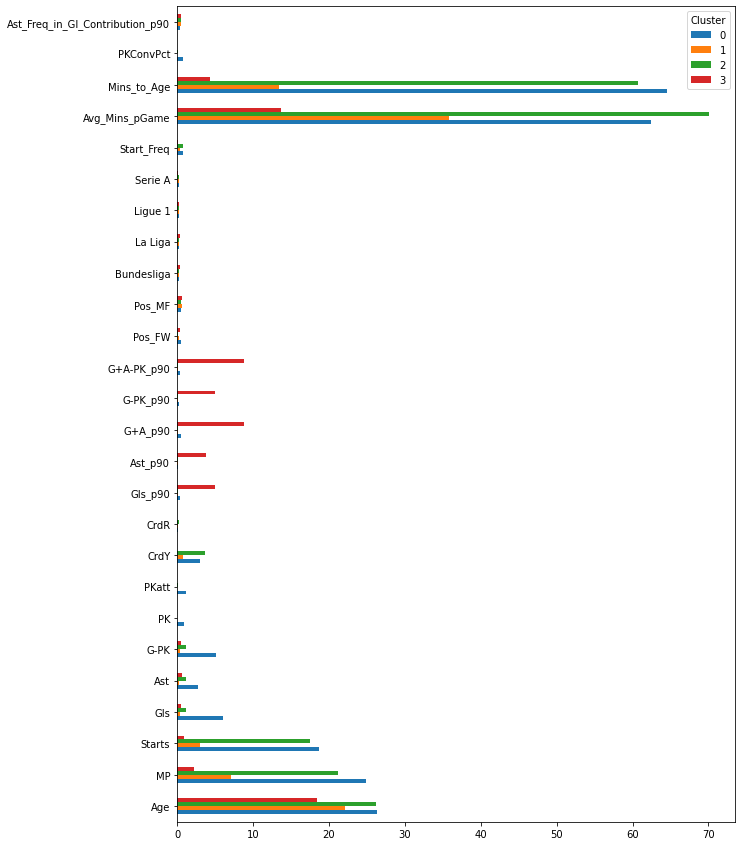

In [16]:
# visualize columns in df
# difference in means for each cluster label
# without year, birthyear, and minutes played columns
km1_cluster_stats.drop(columns=["Year", "Born", "Min"]).groupby("Cluster").mean().T.plot(kind="barh", figsize=(10, 15))
plt.show()

We can immediately see in the `_p90` features the cluster label 3 players (in red) are beyond any reasonable doubt outliers. Let's remove them from our dataset before we run our next iteration of our K-Means model.

In [18]:
# identifying our cluster 3 labelled players
km1_cluster_stats[km1_cluster_stats["Cluster"] == 3]

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90,Cluster
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Borja-Garces,2018.0,18.0,1999.0,1.0,0.0,20.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.50,0.00,4.50,4.50,4.50,1.0,0.0,0.0,1.0,0.0,0.0,0.00,20.00,1.11,0.0,0.00,3
Geoffrey-Mujangi-Bia,2010.0,20.0,1989.0,1.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,7.50,7.50,0.00,7.50,0.0,1.0,0.0,0.0,0.0,0.0,0.00,12.00,0.60,0.0,1.00,3
Hicham-Khaloua,2013.0,18.0,1995.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,22.50,0.00,22.50,22.50,22.50,1.0,0.0,0.0,1.0,0.0,0.0,0.00,4.00,0.22,0.0,0.00,3
Jack-Lahne,2019.0,17.0,2001.0,1.0,0.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.00,0.00,10.00,10.00,10.00,1.0,0.0,0.0,0.0,1.0,0.0,0.00,9.00,0.53,0.0,0.00,3
Linton-Maina,2017.5,18.5,1999.0,10.5,8.5,709.5,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.03,9.10,9.12,0.03,9.12,0.0,1.0,1.0,0.0,0.0,0.0,0.42,37.85,37.35,0.0,0.88,3
Losada,2019.0,17.0,2001.0,2.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.92,0.00,6.92,6.92,6.92,0.0,1.0,0.0,1.0,0.0,0.0,0.00,6.50,0.76,0.0,0.00,3
Metehan-Guclu,2018.0,19.0,1999.0,1.0,0.0,17.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.29,0.00,5.29,5.29,5.29,1.0,0.0,0.0,0.0,1.0,0.0,0.00,17.00,0.89,0.0,0.00,3
Nicola-Zalewski,2020.0,18.0,2002.0,1.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,8.18,8.18,0.00,8.18,0.0,1.0,0.0,0.0,0.0,1.0,0.00,11.00,0.61,0.0,1.00,3
Niklas-Schmidt,2016.0,18.0,1998.0,1.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,6.00,6.00,0.00,6.00,0.0,1.0,1.0,0.0,0.0,0.0,0.00,15.00,0.83,0.0,1.00,3


As suspected, it's an extremely small set of players who played a very low amount of minutes over their careers and managed to get a goal or assist in their short appearances and now their `_p90` metrics have been inflated quite high. Let's remove these players and retry our model.

In [19]:
# shape of our dataset including outliers and iteration 1 labels
km1_cluster_stats.shape

(7968, 30)

In [20]:
# taking our new dataset EXCLUDING outliers 
grouped_stats2 = km1_cluster_stats[km1_cluster_stats["Cluster"] != 3].copy()
# check to see they're gone (-10 rows)
grouped_stats2.shape # looks good

(7958, 30)

In [21]:
# dropping our cluster label as we'd like to re-run our model
grouped_stats2.drop(columns="Cluster", inplace=True)
# check to see our cluster label row is gone (-1 column)
grouped_stats2.shape # looks good

____________________

# Model 1.2 - K-Means Without Outliers 

### 1.2 - Scaling Data

Rather than dropping the outliers from our previous scaled dataset and re-running our model, we'll want to rescale the original dataset excluding the outliers. 

The reason we do this is to prevent the outliers from still having an affect on our data even though they've been dropped. If we kept the originally scaled dataset, the scalar was already fitted to their metrics which we discovered weren't truly representative of their ability due to their small sample size of minutes played. This caused a major skew in the scalar as the other players (who had representative metrics) would look much worse when compared with the high-value outliers in our scalar. 

By taking a copy of the original non-scaled values, dropping the outliers, and rescaling the data, we prevent the outliers from skewing the scalar's numbers on the rest of the players in our dataset.

In [23]:
# instantiate standard scaler
ss = StandardScaler()

# unsupervised learning so no train/test set
# IFT on entire dataset

# fit and transform
scaled_data = ss.fit_transform(grouped_stats2)

In [24]:
type(scaled_data)

numpy.ndarray

We'll need to put our scaled data back into a DataFrame with our players and features for context. Let's assemble our scaled data into a DataFrame once more.

In [25]:
# putting scaled values back into df

# non-scaled columns / index to piece together new df filled with scaled values
grouped_scaled_stats2 = pd.DataFrame(scaled_data, columns=grouped_stats2.columns, index=grouped_stats2.index)

# check that it worked - looks good
grouped_scaled_stats2

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,1.450572,-1.113646,1.544429,0.572607,0.062300,0.041130,0.564963,0.100220,0.688959,-0.257431,-0.277289,-1.040105,-0.493537,0.712249,0.149447,0.634553,0.791136,0.680372,2.478991,-1.174217,-0.484890,-0.533449,-0.560940,-0.536301,-0.014558,-0.178104,0.445159,-0.378113,-0.671269
Aaron-Cresswell,0.642937,0.626071,-0.217713,1.794966,2.293908,2.313604,-0.054755,1.797378,-0.008660,-0.257431,-0.277289,0.735802,0.634873,-0.352821,0.214468,-0.118630,-0.339907,-0.098743,-0.452085,-0.554825,-0.484890,-0.533449,-0.560940,-0.536301,1.272333,1.371617,2.141141,-0.378113,1.019747
Aaron-Hickey,1.612099,-1.461589,1.864819,-0.437169,-0.106846,-0.305403,-0.574224,-0.692844,-0.593428,-0.257431,-0.277289,0.340134,3.397529,-0.520990,-0.435742,-0.633965,-0.518493,-0.631822,-0.452085,-1.174217,-0.484890,-0.533449,-0.560940,2.034665,1.084007,0.647734,0.086374,-0.378113,0.117872
Aaron-Hughes,-1.133861,1.669900,-1.819661,0.891483,1.302709,1.353143,-0.460306,-0.692844,-0.465190,-0.257431,-0.277289,-0.695045,-0.493537,-0.464934,-0.435742,-0.594324,-0.458964,-0.590816,-0.452085,-1.174217,-0.484890,-0.533449,-0.560940,-0.536301,1.178170,1.344004,0.864240,-0.378113,-1.723457
Aaron-Hunt,-0.432833,0.549523,-0.698298,0.685276,0.758057,0.734559,1.148227,1.337401,0.719736,2.784679,2.921640,-0.322381,-0.065519,0.656193,0.344510,0.634553,0.433965,0.475341,-0.452085,0.961616,2.228456,-0.533449,-0.560940,-0.536301,0.613194,0.571692,0.668025,2.332470,-0.220331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zouhair-Feddal,0.365110,0.658545,-0.217713,0.337701,0.746780,0.726120,-0.054755,-0.129768,-0.008660,-0.257431,-0.277289,1.982618,2.852780,-0.184652,-0.175658,-0.237553,-0.161321,-0.221761,-0.452085,-0.554825,-0.484890,1.313720,-0.560940,0.209279,1.240945,1.328711,0.584741,-0.378113,-0.182753
Zouheir-Dhaouadi,-0.972334,-0.069816,-0.377908,-0.756045,-1.121726,-0.985465,-0.118549,-0.692844,-0.080474,-0.257431,-0.277289,-1.040105,-0.493537,1.609151,-0.435742,0.872400,1.743594,0.926408,-0.452085,0.961616,-0.484890,-0.533449,1.942993,-0.536301,-1.395611,-1.031555,-0.990314,-0.378113,-1.723457
Zubi,-0.649280,-0.997665,0.423066,-1.500090,-1.234491,-1.283236,-0.574224,-0.692844,-0.593428,-0.257431,-0.277289,-1.040105,-0.493537,-0.520990,-0.435742,-0.633965,-0.518493,-0.631822,-0.452085,0.961616,-0.484890,2.068198,-0.560940,-0.536301,-1.772262,-2.024770,-1.306457,-0.378113,0.155450


We've once again created a DataFrame containing our scaled values. This time it does not include the 10 players that were cluster-labelled together by our first K-Means model due to their outlier stats.

We can now re-run our second K-Means model on this data and see if our clusters change.

Once again we'll search for an optimal K-value using a for loop. Being sure to keep track of the inertia and silhouette scores to identify our optimal K-value for this second iteration of our model.

### 1.2 - Determining an Optimal K-Value

In [26]:
# looking at inertia and silhouette scores for each k-value in our second KMM

# list of metrics
metrics = []

# Ks to search over 1-20
k_vals = np.arange(1, 21)

# iterating over Ks in for loop
for k in k_vals:
    
    # instantiate
    # setting number of cluster to our range of k values
    # random state for reproducability
    kmm = KMeans(n_clusters=k, random_state=1)
    
    # fit on whole dataset (unsupervised learning)
    kmm.fit(grouped_scaled_stats2)
    
    # predict cluster labels
    kmm_labels = kmm.predict(grouped_scaled_stats2)
    
    # look at inertia of model
    inertia = kmm.inertia_
    
    # silhouette score
    # cant create a silhouette score on 1 cluster so we create if/else statement to address it
    if k > 1:
        silhouette = silhouette_score(grouped_scaled_stats2, kmm_labels)
    else:
        silhouette = np.NaN
        
    # adding our metrics through dictionary
    metrics.append({"inertia":inertia, "silhouette":silhouette})

Let's pull our inertia and silhouette scores into a DataFrame to see our results.

In [27]:
# putting the results into a df
metrics_df = pd.DataFrame(metrics, index=k_vals)

# check
metrics_df.head()

,inertia,silhouette
1,230782.000000,NaN
2,188358.376379,0.183496
3,163113.386930,0.181681
4,152620.259741,0.188755
5,145000.649466,0.112635


Similar to our first K-Means model, we see that a K-value of `4` shows promise with the highest silhouette score (18.88%) right before a sharp drop at a K-value of 5. We'll need to take a look at the graph showing all of our K-values before we can call `4` our winner.

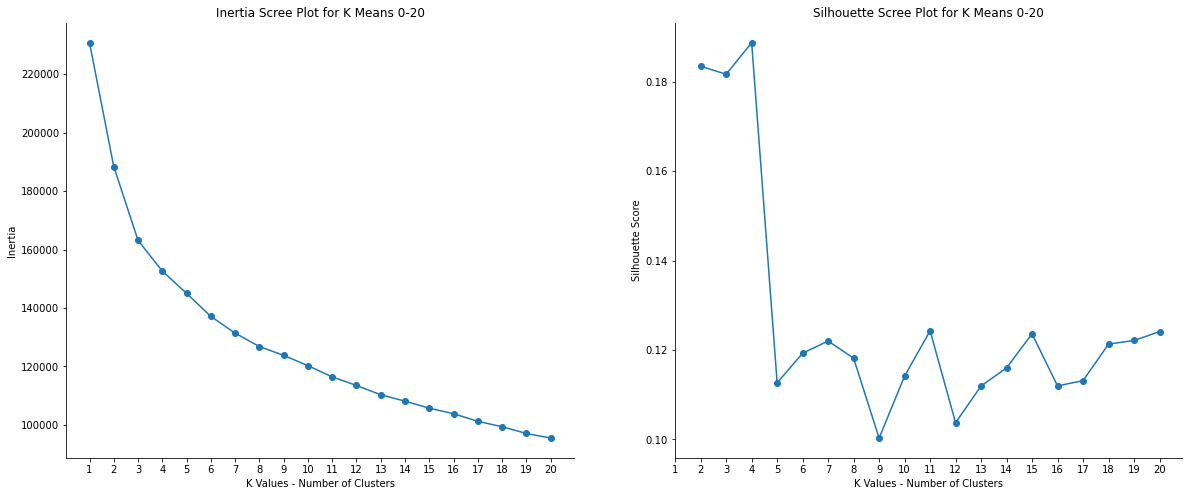

In [28]:
# Visualize subplots
plt.subplots(1, 2, figsize=(20, 8))

# subplot 1 - inertia
plt.subplot(1, 2, 1)
metrics_df["inertia"].plot(marker="o")

# labels and cleaning for subplot 1
plt.title("Inertia Scree Plot for K Means 0-20")
plt.ylabel("Inertia")
plt.xlabel("K Values - Number of Clusters")
plt.xticks(k_vals)
plt.ticklabel_format(style='plain') # don't want scientific notation
sns.despine()

# subplot 2 - silhouette
plt.subplot(1, 2, 2)
metrics_df["silhouette"].plot(marker="o")

# labels and cleaning for subplot 2
plt.title("Silhouette Scree Plot for K Means 0-20")
plt.ylabel("Silhouette Score")
plt.xlabel("K Values - Number of Clusters")
plt.xticks(k_vals)
sns.despine()

# show and save
plt.savefig("Inertia and Silhouette Scree Plot for K Means 1-20 excluding outliers.png")
plt.show()


The chart is pretty close to our first run of the model earlier however we do see more sporadic jumps & drops in silhouette scores for our K-values 5-16 however the score never comes close to the scores when the K-value is < 5. Once again there's no hard "elbow" in our inertia scores so our optimal K-value is not a hard-fast selection. Restating our intuition from earlier - we don't want a large number of clusters with our dataset as we're only trying to produce a few "profiles" players will fit into. 

With this knowledge and factoring in our silhouette scores, we'll once again select our K-value to be 4.

### 1.2 - Modelling

In [29]:
# Fit second iteration of KMM 

# instantiate
# 4 was optimal K, random_state for reproducability
kmm_second = KMeans(n_clusters=4, random_state=1)

# fit
kmm_second.fit(grouped_scaled_stats2)

# get cluster labels from prediction
kmm_second_labels = kmm_second.predict(grouped_scaled_stats2)

Let's quickly compare our first and second model inertias to see if we improved the Within Sum of Squares distance (inertia).

In [30]:
print(f"""
Our first K-Means iteration gave us an inertia score of: {round(kmm_first.inertia_, 2)}.
Our second K-Means iteration gave us an inertia score of: {round(kmm_second.inertia_, 2)}.
Overall, this gives us a decrease of {round(round(kmm_first.inertia_, 2) - (round(kmm_second.inertia_, 2)),2)} in our inertia score! 
While the decrease is not extremely large in relative terms, the closer our inertia is to zero the better so this tells us we're on the right track.
""")


Our first K-Means iteration gave us an inertia score of: 154595.18.
Our second K-Means iteration gave us an inertia score of: 152620.26.
Overall, this gives us a decrease of 1974.92 in our inertia score! 
While the decrease is not extremely large in relative terms, the closer our inertia is to zero the better so this tells us we're on the right track.



### 1.2 - Clustered Group Sizing

We've run our model and saved our cluster labels in `kmm_second_labels`, let's take a look at what the second iteration of our K-Means model uncovered.

In [31]:
# lets take a look at the sizings
np.unique(kmm_second_labels, return_counts=True)

(array([0, 1, 2, 3]), array([ 536, 3305, 3078, 1039], dtype=int64))

Compared to our previous run, we see some similarities but also some major differences as well.
- Our two largest clusters (labels 1 & 2) remained intact through both models, although the number of players decreased in each. That could likely be accredited to the next point.
- A new clustering group was found! In our first model we had a single cluster label allocated to 10 outliers. With them removed we can see our model identified a new cluster to replace the outliers.


Let's attach our labels to the player's dataset containing the original values and do a small investigation into their clusters to ensure we don't have the same issue we saw in 1.1.

We'll once again do a quick shape check to ensure the number of rows match before attaching our labels.

In [32]:
# rows size check
kmm_second_labels.shape[0] == grouped_scaled_stats2.shape[0]

True

In [33]:
# attaching labels

# make copy of original stats dataframe
km2_cluster_stats = grouped_stats2.copy()

# attach new column with the cluster labels
km2_cluster_stats["Cluster"] = kmm_second_labels

# check
km2_cluster_stats

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90,Cluster
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,2019.50,19.50,2000.0,20.50,11.50,1024.50,2.50,1.00,2.50,0.00,0.00,0.00,0.00,0.22,0.09,0.32,0.22,0.32,1.0,0.00,0.0,0.00,0.0,0.00,0.56,49.47,52.88,0.00,0.28,3
Aaron-Cresswell,2017.00,27.00,1989.0,32.00,31.29,2772.14,1.14,3.14,1.14,0.00,0.00,3.86,0.29,0.03,0.10,0.13,0.03,0.13,0.0,0.29,0.0,0.00,0.0,0.00,0.97,85.95,103.79,0.00,0.73,1
Aaron-Hickey,2020.00,18.00,2002.0,11.00,10.00,758.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,1.00,0.91,68.91,42.11,0.00,0.49,1
Aaron-Hughes,2011.50,31.50,1979.0,23.50,22.50,2033.50,0.25,0.00,0.25,0.00,0.00,0.75,0.00,0.01,0.00,0.01,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.94,85.30,65.46,0.00,0.00,1
Aaron-Hunt,2013.67,26.67,1986.0,21.56,17.67,1557.78,3.78,2.56,2.56,1.22,1.56,1.56,0.11,0.21,0.12,0.32,0.16,0.27,0.0,1.00,1.0,0.00,0.0,0.00,0.76,67.12,59.57,0.79,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zouhair-Feddal,2016.14,27.14,1989.0,18.29,17.57,1551.29,1.14,0.71,1.14,0.00,0.00,6.57,0.86,0.06,0.04,0.10,0.06,0.10,0.0,0.29,0.0,0.71,0.0,0.29,0.96,84.94,57.07,0.00,0.41,1
Zouheir-Dhaouadi,2012.00,24.00,1988.0,8.00,1.00,235.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.38,0.0,1.00,0.0,0.00,1.0,0.00,0.12,29.38,9.79,0.00,0.00,3
Zubi,2013.00,20.00,1993.0,1.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,1.00,0.0,0.00,0.00,6.00,0.30,0.00,0.50,2


We've successfully attached our rows, let's take a quick glance at the averages for the stats in each of our clusters.

In [34]:
km2_cluster_stats.groupby("Cluster").mean().T

Cluster,0,1,2,3
Year,2015.093004,2014.814829,2015.219682,2014.965428
Age,26.604347,26.144923,21.883678,24.408412
Born,1988.140037,1988.320877,1992.992355,1990.186064
MP,26.455056,21.363340,6.102901,16.071184
Starts,20.873657,17.884396,2.632742,8.393234
Min,1849.894086,1589.615501,266.796384,803.496420
Gls,7.049534,0.965564,0.131559,2.554081
Ast,3.268862,1.065564,0.154103,1.159009
G-PK,5.860578,0.939924,0.129214,2.464899
PK,1.188974,0.025555,0.002339,0.089153


These values look much more normal compared to the absurd numbers our previous outlier cluster showed. The only cluster label of concern is label 0 as the values in their `_p90` columns are quite high. However, looking at cluster 3 we can see values in the `_p90` columns that are fairly close to those of cluster 0 so it's safe to assume that both are not outliers but rather overachievers when compared to cluster labels 1 & 2. 

This model's clustering results is showing early signs of promise with this labelling. We won't dive fully in to these clustered groups yet as there are a few more models to try before we choose our best.

Overall, we slightly decreased our inertia while maintaining a silhouette score relatively close to our first model. We also managed to cluster the players in the dataset with sizes for each label that seemed much more in-line with our expectations. Between our two iterations of our K-Means model this model shows more promise in identifying different player profiles.

Lets introduce a second type of model now to compare against our K-Means.
_______________

# Model 2 - Hierarchical Clustering

Our second K-Means Models that excluded outliers revealed clustering groups that we believe show promise. However, besides our inertia and silhouette scores, we don't have anything else to benchmark the performance of the two K-Means models against. 

Let's introduce a different type of model for our third model. For this model we'll use **Agglomerative Hierarchical Clustering**

Agglomerative hierarchical clustering works from a bottom up approach, iteratively joining groups of data points that are nearby or similar with respect to distance. With each data point being a cluster, a process of joining two of the closest clusters are merged to form a new cluster, this process is repeated until a stopping criteria is met.

Since we've already scaled our outliers-excluded data, it's unnecessary to go through the process again. We will reuse the scaled dataset that doesn't include the cluster labels from the previous K-Means model.

### 2.1 - Finding Optimal K-Value

In [55]:
# importing our new model
from sklearn.cluster import AgglomerativeClustering

# Explore different K values
k_vals = np.arange(1, 21)

# initalize list to hold metrics
metrics_list = []

for k in k_vals:
    # instantiate model
    agg = AgglomerativeClustering(n_clusters=k, linkage="ward")

    # fit
    agg.fit(grouped_scaled_stats2)
    
    # Calculate silhouette score
    # First get cluster labels
    agg_cluster_labels = agg.fit_predict(grouped_scaled_stats2)
    # now calculate silhouette
    if k > 1:
        agg_silhouette = silhouette_score(grouped_scaled_stats2, agg_cluster_labels)
    else:
        agg_silhouette = np.NaN
    
    # add to list
    metrics_list.append({"silhouette": agg_silhouette})


Now that our Agglomerative clustering model is complete, let's take a look at the silhouette score. Unfortunately Agglomerative clustering does not track inertia so we are unable to compare it with our K-Means models.

In [68]:
# putting results into a df
agg_metrics_df = pd.DataFrame(metrics_list, index=k_vals)

# check
agg_metrics_df.head()

,silhouette
1,NaN
2,0.144341
3,0.134863
4,0.146944
5,0.080279


Our Agglomerative clustering model shows us similar results to what we saw in our two K-Means models. A silhouette score that peaks at a K-value of 4 before dropping significantly after it. This time however, our Agglomerative clustering model starts at a much lower value than what we saw from our K-Means. Our second K-Means model gave us an initial silhouette score of 18.35% versus this model which started us at 14.43%. This tells us that the cluster labels in this Agglomerative clustering model aren't as defined compared to our K-Means model clusters.

However, these scores only represent our first 5 K-values. Let's look at the remaining K-values in a graph to see the full result of our for loop.

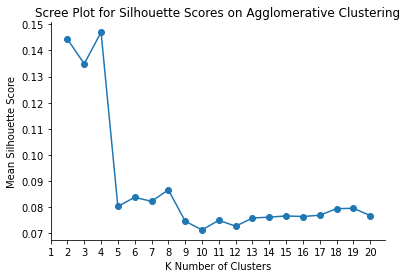

In [71]:
# Silhouette score plot
plt.figure()
plt.plot(agg_metrics_df.index, agg_metrics_df["silhouette"], marker="o")

# labels, titles, cleaning
plt.title("Scree Plot for Silhouette Scores on Agglomerative Clustering")
plt.xlabel("K Number of Clusters")
plt.ylabel("Mean Silhouette Score")
plt.xticks(k_vals)
sns.despine()
plt.show()

We can see that once again the optimal K-value is 4 value with a silhouette score of 14.69%. Now that we've identified our optimal K-value let's plug that into our Agglomerative Clustering model.

### 2.1 - Modelling 

In [40]:
# instantiate agg model with optimal K value
agg_first = AgglomerativeClustering(n_clusters=4)

# fit
agg_first.fit(grouped_scaled_stats2)

# get labels
agg_first_labels = agg_first.labels_

### 2.1 - Comparing Identified Clustered Groups

Let's take a look at the clusters our Agglomerative clustering model created.

In [72]:
# agglomerative clustering labels without outliers
np.unique(agg_first_labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([4149,  670, 2800,  339], dtype=int64))

For reference, let's also pull up the cluster labels our excluding outliers K-Means model created.

In [42]:
# kmm labels without outliers
np.unique(kmm_second_labels, return_counts=True)

(array([0, 1, 2, 3]), array([ 536, 3305, 3078, 1039], dtype=int64))

Compared to our K-Means we can see that the Agglomerative clustering (AC) model created much different groups just off size alone. 

First, while there were still two labels created that held the majority of the players we can see that in the AC model they were larger and their share of players changed. Of the two large clusters in our AC model one now holds a majority over the other, this is interesting when compared to our K-Means model where both of the large clusters had an almost equal amount of players between the two. 

Secondly, it seems the players that we had identified as possible overachievers in our K-Means model have been recognized by our AC model and are held in even higher regard by this model as the amount of players in said clusters has shrunk by approximately 40% in both columns. We can't say for certain yet as we haven't check the average stats per cluster label. Let's do this now.

In [43]:
# make copy of original stats dataframe (excluding outliers)
agg1_cluster_stats = grouped_stats2.copy()

# attach new column with the cluster labels
agg1_cluster_stats["Agg_Cluster"] = agg_first_labels

# check
agg1_cluster_stats

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90,Agg_Cluster
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,2019.50,19.50,2000.0,20.50,11.50,1024.50,2.50,1.00,2.50,0.00,0.00,0.00,0.00,0.22,0.09,0.32,0.22,0.32,1.0,0.00,0.0,0.00,0.0,0.00,0.56,49.47,52.88,0.00,0.28,0
Aaron-Cresswell,2017.00,27.00,1989.0,32.00,31.29,2772.14,1.14,3.14,1.14,0.00,0.00,3.86,0.29,0.03,0.10,0.13,0.03,0.13,0.0,0.29,0.0,0.00,0.0,0.00,0.97,85.95,103.79,0.00,0.73,2
Aaron-Hickey,2020.00,18.00,2002.0,11.00,10.00,758.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,1.00,0.91,68.91,42.11,0.00,0.49,0
Aaron-Hughes,2011.50,31.50,1979.0,23.50,22.50,2033.50,0.25,0.00,0.25,0.00,0.00,0.75,0.00,0.01,0.00,0.01,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.94,85.30,65.46,0.00,0.00,2
Aaron-Hunt,2013.67,26.67,1986.0,21.56,17.67,1557.78,3.78,2.56,2.56,1.22,1.56,1.56,0.11,0.21,0.12,0.32,0.16,0.27,0.0,1.00,1.0,0.00,0.0,0.00,0.76,67.12,59.57,0.79,0.40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zouhair-Feddal,2016.14,27.14,1989.0,18.29,17.57,1551.29,1.14,0.71,1.14,0.00,0.00,6.57,0.86,0.06,0.04,0.10,0.06,0.10,0.0,0.29,0.0,0.71,0.0,0.29,0.96,84.94,57.07,0.00,0.41,0
Zouheir-Dhaouadi,2012.00,24.00,1988.0,8.00,1.00,235.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.38,0.0,1.00,0.0,0.00,1.0,0.00,0.12,29.38,9.79,0.00,0.00,0
Zubi,2013.00,20.00,1993.0,1.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,1.00,0.0,0.00,0.00,6.00,0.30,0.00,0.50,0


We've created our DataFrame with our Agglomerative clustering model's labels attached. Now we may look at the average stats per cluster label.

In [44]:
agg1_cluster_stats.groupby("Agg_Cluster").mean().T

Agg_Cluster,0,1,2,3
Year,2015.050328,2014.513851,2015.036804,2015.271327
Age,22.766459,24.854746,26.161179,26.622950
Born,1991.940624,1989.298284,1988.524607,1988.250590
MP,8.939152,15.858881,22.613550,27.246342
Starts,5.284259,8.377537,18.632364,21.865487
Min,497.888139,807.496507,1656.581168,1935.299971
Gls,0.317081,2.828866,1.431882,8.283746
Ast,0.303938,0.984776,1.385132,3.401563
G-PK,0.316640,2.684507,1.356807,6.770059
PK,0.000443,0.144343,0.074968,1.513628


As we suspected, the AC model did recognize the overachievers and labeled them in cluster 3. Not only did it label them but as we mentioned earlier it held them in a much stricter cluster as far less players were included in this cluster. Players that would've made cluster 3 in our K-Means model (equivalent was labeled 0 in KMM) were instead cut off and likely dropped into one of the two larger clusters containing "middle of the pack" players.

When looking at `Ast_Freq_in_Gl_Contribution_p90`, and `Pos_FW` it seems as though these 2 columns are quite similar in cluster labels 1 & 3. Finishing forwards who can put the ball in the back of the net and convert chances into goals. Yet these labels differ due to things like `Age`, `Start_Freq`, and `Mins_to_Age`. Label 1's players are much younger, start less, and play less per game on average. It seems like label 1 players could be considered future label 3 players if they maintained the skill level they're playing at now, they just need more playing opportunities.

While these cluster labels do show promise, the silhouette score compared to K-Means does concern us slightly as the data points being clustered together through this model are becoming less cohesive.

Let's introduce one last model before making a decision between all the models we have tried thus far. 

_________________

# Model 3 - DBSCAN With T-SNE

Let's try using T-SNE to take our dataset from a high dimensional space down to 2 dimensions and then use DBSCAN to see if we can identify clusters through the T-SNE reduced data.
We will need to use our scaled dataset when we perform T-SNE as we want each dimension to be treated with equal importance. If we don't use the scaled dataset the vector magnitude will be heavily influenced by dimensions with large variance. By scaling our data we make the variance the same across all dimensions, as shown by the code below.

In [46]:
# showing the variance is the same across all dimensions in this dataset
grouped_scaled_stats2.var()

Year                               1.000126
Age                                1.000126
Born                               1.000126
MP                                 1.000126
Starts                             1.000126
Min                                1.000126
Gls                                1.000126
Ast                                1.000126
G-PK                               1.000126
PK                                 1.000126
PKatt                              1.000126
CrdY                               1.000126
CrdR                               1.000126
Gls_p90                            1.000126
Ast_p90                            1.000126
G+A_p90                            1.000126
G-PK_p90                           1.000126
G+A-PK_p90                         1.000126
Pos_FW                             1.000126
Pos_MF                             1.000126
Bundesliga                         1.000126
La Liga                            1.000126
Ligue 1                         

As our data is already scaled, we can fit our T-SNE to the dataset and begin with our DBSCAN model.

### 3.1 - Dimension Reduction with T-SNE

As stated earlier, we want to compress the number of features we currently have (29) down to 2 to be able to visualize our dataset on a 2D visual. Once that is complete we can run a DBSCAN model over the visual and observe the results. Let's fit our scaled data with the T-SNE now.

In [47]:
# importing TSNE
from sklearn.manifold import TSNE

# instantiating tsne with only 2 dimensions
# random_state of 1 for reproducability
my_TSNE = TSNE(n_components=2, random_state=1)

# fitting and transforming on entire scaled dataset
TSNE_stats = my_TSNE.fit_transform(grouped_scaled_stats2)

#### 3.1 - Visualizing the Data

Now that we've utilized T-SNE to take our dataset down to two dimensions, let's visualize it!

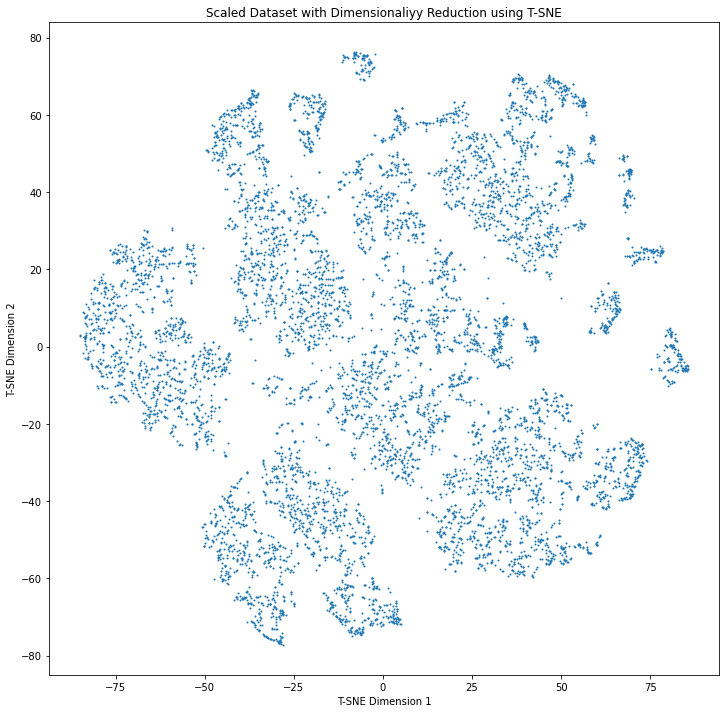

In [89]:
plt.figure(figsize=(12, 12))
plt.scatter(TSNE_stats[:, 0], TSNE_stats[:, 1], s=1)

# labels, titles, cleaning
plt.title("Scaled Dataset with Dimensionaliyy Reduction using T-SNE")
plt.xlabel("T-SNE Dimension 1")
plt.ylabel("T-SNE Dimension 2")
plt.show()

There aren't many large clusters in our T-SNE dimension reduced data which may not bode well for our DBSCAN model as it relies on data points being quite close together to identify a cluster. We can see visually that the points are quite sparse across the visual. We will continue on with our DBSCAN model but with these considerations we shouldn't expect strong results.

### 3.1 - Finding an Optimal Epsilon Value

Now that we've seen our data condensed into two dimensions through T-SNE, let's run a DBSCAN model through it. To decide what epsilon value we'll choose we'll run a for loop again similar to our K-Means. The difference for trying different values in this loop is we'll need to track the number of clusters determined by this algorithm and ensure we don't include noise points (those with a label of -1) in the silhouette score calculation.

In [49]:
from sklearn.cluster import DBSCAN
# instantiate empty list of silhouette scores and cluster counts
silhouette_scores = []
n_clusters = []
non_noise_pts = []
noise_pts = []
eps = [0.01, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.25, 2.5, 2.75, 3]

# iterate over eps
for e in eps:
    
    # instantiate
    dbscan = DBSCAN(eps=e, min_samples=7)

    # fit and get cluster labels

    db_cluster_labels = dbscan.fit_predict(TSNE_stats)
    
    # locate non-noise points
    non_noise = db_cluster_labels[db_cluster_labels != -1]
    
    # number of noise points and non noise pts
    n_noise = len(db_cluster_labels[db_cluster_labels == -1]) # noise is labeled -1, we want these
    n_non_noise = len(db_cluster_labels[db_cluster_labels != -1]) # here we want anything not labeled -1
    
    # get silhouette score and number of clusters
    n_cluster = len(np.unique(non_noise))
    
    # cant have silhouette score for cluster of 1 
    # so we create if/else to address
    if n_cluster > 1:
        silhouette = silhouette_score(TSNE_stats, db_cluster_labels)
    else:
        silhouette = np.NaN
        
    # append to list
    n_clusters.append(n_cluster)
    silhouette_scores.append(silhouette)
    non_noise_pts.append(n_non_noise)
    noise_pts.append(n_noise)

Let's take our results and put them in a DataFrame.

In [50]:
# putting results into a df
pd.DataFrame({"eps": eps,
              "n_clusters": n_clusters,
              "silhouette": silhouette_scores,
              "Number of non_noise_pts": non_noise_pts,
              "Number of noise_pts": noise_pts})

,eps,n_clusters,silhouette,Number of non_noise_pts,Number of noise_pts
0,0.01,0,NaN,0,7958
1,0.10,0,NaN,0,7958
2,0.25,0,NaN,0,7958
3,0.50,17,-0.535035,141,7817
4,0.75,84,-0.664693,871,7087
5,1.00,224,-0.424503,2524,5434
6,1.50,268,0.157588,6589,1369
7,2.00,89,0.110774,7595,363
8,2.25,53,-0.073324,7727,231
9,2.50,35,-0.016265,7793,165


From our fairly wide range of epsilon values (0.01 - 3.0) DBSCAN wasn't able to produce a promising silhouette score with a number of clusters that matches the number of clusters we were intuitively expecting with our dataset. We can see that only at an `eps` value of 3 did we finally start to get a silhouette score close to what we saw in our K-Means and Agglomerative Clustering models. However it's still not worth investigating further as the `n_clusters` is 17 which is a much higher number of clusters than we were hoping to have. At this point we won't proceed any further with the DBSCAN model.

___________

# Final Model Choice

Now that we've used three different models on our dataset we'll need to pick a final model and attach it's cluster labels to our dataset. This dataset with cluster labels will become our final dataset from which we will gather insights about the different identified groups created by our model of choice.

We will immediately rule out the DBSCAN model due to it's extremely poor clustering on the T-SNE data. We will also remove the first iteration of our K-Means model as the players with very low minutes played were affecting the model's clusters. That leaves us with two potential models: 
1. The second iteration of our K-Means model (Model 1.2)
2. The Agglomerative clustering model (Model 2.1)

We saw in the Agglomerative clustering model that the two smaller cluster groups were primarily forward players as highlighted by the high average value in the `Pos_FW` column as well as the low average values in the `Ast_Freq_in_Gl_Contribution_p90` signifying they score more than they assist in their goal contributions. The remaining two clusters seemed to carry the remainder of the players which seemed to be anyone that was not in the forward/striker position. 

When compared to our K-Means model (1.2) we saw there was less focus on the position of a player and more on there `_p90` metrics. We saw greater differentiation in the values for these features as well as the `Ast_Freq_in_Gl_Contribution_p90`, `Age`, and `Start_Freq` across the four clusters. It seems like based on the cluster labels from our K-Means model, more features were taken into account when compared to our AC model which focused primarily on players in the forward/striker position, assigning anything else that didn't fit those two cluster into 1 of 2 buckets. 

In summary, the K-Means model focused more on the overall skill and profile of the players when clustering compared to a few metrics that the AC model honed in on. We also received better silhouette scores on our K-Means model by about 4% compared to our Agglomerative clustering model. 

Since our K-Means model considered more factors when clustering and we received a higher silhouette score on it, we'll opt to use the K-Means model (1.2) as our final model. 

Now that we've decided on our final model, let's pull the dataset we created earlier (Under 1.2 - Clustered Group Sizing)  that has that model's cluster labels already attached to the players. This dataset will be used for our analysis on the identified groups.

In [91]:
# retrieving the dataset with model 1.2's labels on the players
km2_cluster_stats

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,Pos_FW,Pos_MF,Bundesliga,La Liga,Ligue 1,Serie A,Start_Freq,Avg_Mins_pGame,Mins_to_Age,PKConvPct,Ast_Freq_in_Gl_Contribution_p90,Cluster
Player_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron-Connolly,2019.50,19.50,2000.0,20.50,11.50,1024.50,2.50,1.00,2.50,0.00,0.00,0.00,0.00,0.22,0.09,0.32,0.22,0.32,1.0,0.00,0.0,0.00,0.0,0.00,0.56,49.47,52.88,0.00,0.28,3
Aaron-Cresswell,2017.00,27.00,1989.0,32.00,31.29,2772.14,1.14,3.14,1.14,0.00,0.00,3.86,0.29,0.03,0.10,0.13,0.03,0.13,0.0,0.29,0.0,0.00,0.0,0.00,0.97,85.95,103.79,0.00,0.73,1
Aaron-Hickey,2020.00,18.00,2002.0,11.00,10.00,758.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,1.00,0.91,68.91,42.11,0.00,0.49,1
Aaron-Hughes,2011.50,31.50,1979.0,23.50,22.50,2033.50,0.25,0.00,0.25,0.00,0.00,0.75,0.00,0.01,0.00,0.01,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.94,85.30,65.46,0.00,0.00,1
Aaron-Hunt,2013.67,26.67,1986.0,21.56,17.67,1557.78,3.78,2.56,2.56,1.22,1.56,1.56,0.11,0.21,0.12,0.32,0.16,0.27,0.0,1.00,1.0,0.00,0.0,0.00,0.76,67.12,59.57,0.79,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zouhair-Feddal,2016.14,27.14,1989.0,18.29,17.57,1551.29,1.14,0.71,1.14,0.00,0.00,6.57,0.86,0.06,0.04,0.10,0.06,0.10,0.0,0.29,0.0,0.71,0.0,0.29,0.96,84.94,57.07,0.00,0.41,1
Zouheir-Dhaouadi,2012.00,24.00,1988.0,8.00,1.00,235.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.38,0.38,0.0,1.00,0.0,0.00,1.0,0.00,0.12,29.38,9.79,0.00,0.00,3
Zubi,2013.00,20.00,1993.0,1.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,1.00,0.0,0.00,0.00,6.00,0.30,0.00,0.50,2


Let's perform a quick last-second sanity check to ensure our labels were attached correctly.

In [93]:
# check part 1
np.unique(kmm_second_labels, return_counts=True)

(array([0, 1, 2, 3]), array([ 536, 3305, 3078, 1039], dtype=int64))

In [94]:
# check part 2
km2_cluster_stats["Cluster"].value_counts()

1    3305
2    3078
3    1039
0     536
Name: Cluster, dtype: int64

They match! Great. We can now save our final dataset that will be used for analysis on the identified groups through clustering. The analysis on these groups will be done in the next notebook - **5. Findings**.

In [95]:
# save our dataset that includes final model's labels for our findings
km2_cluster_stats.to_csv(path_or_buf="FormattedCapstoneData/clustered_player_stats.csv")

We've successfully saved the dataset and can now move on to our investigating our clusters and speaking about the findings in the next notebook. 
_______________________________________

# Conclusion

In this notebook we performed unsupervised learning using three unique clustering models. The models used were K-Means, Agglomerative Clustering, and DBSCAN. Using the metrics inertia (where applicable) and silhouette score, we evaluated the performance on the model's clustering ability. A for loop was also performed to determine the optimal K-value for our K-Means and Agglomerative Clustering models. The same was done for the epsilon value in our DBSCAN model. We performed two iterations of our K-Means model due to the first model allocating a cluster for 10 players with extreme outlier values due to a small sample size in their time played. These players were removed and the K-Means model was ran once more and yielded our best results of the three unique model types. After gathering the cluster labels from this model, we attached these cluster labels to our dataset with the original, unscaled values and the dataset was saved as a csv. 

This csv will be loaded in for analysis in the next notebook ***5. Findings***.